In [1]:
import os

os.chdir("..")
print(f"Changed working directory to: {os.getcwd()}")

Changed working directory to: /Users/gabriel.torres/Nextcloud/Development/Pro5D/FlareSense


In [2]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from ecallisto_ng.plotting.plotting import plot_spectogram_mpl, plot_spectogram

In [3]:
data_path = pathlib.Path("data/raw/exported")
metadata = pd.read_csv(f"{data_path}/metadata.csv")

no_bursts = metadata.loc[metadata.type == "no_burst"]
type1_bursts = metadata.loc[metadata.type == "I"]
type2_bursts = metadata.loc[metadata.type == "II"]
type3_bursts = metadata.loc[metadata.type == "III"]
type4_bursts = metadata.loc[metadata.type == "IV"]
type5_bursts = metadata.loc[metadata.type == "V"]
type6_bursts = metadata.loc[metadata.type == "VI"]

In [4]:
def preprocess(df, length=224):
    length_s = (df.index.max() - df.index.min()).total_seconds()
    resampling_s = np.round((length_s / length)).astype(int)
    df = df.resample(f"{resampling_s}s").max()
    print(f"Shape after resampling: {df.shape}")
    return df

Hier visualisiere ich mit der plot_spectrogram_mpl Funktion von ecallisto_ng ein Spektrum von einem Datenpunkt ohne Burst. Die Daten werden resampled und das maximum der Daten wird genommen.

datetime_start                              2021-08-23 01:27:00.077
datetime_end                                2021-08-23 01:41:59.942
instruments                                       Australia-ASSA_01
type                                                       no_burst
file_name         Australia-ASSA_01/no_burst/2021-08-23_01-27-00...
Name: 0, dtype: object

Shape after resampling: (225, 193)


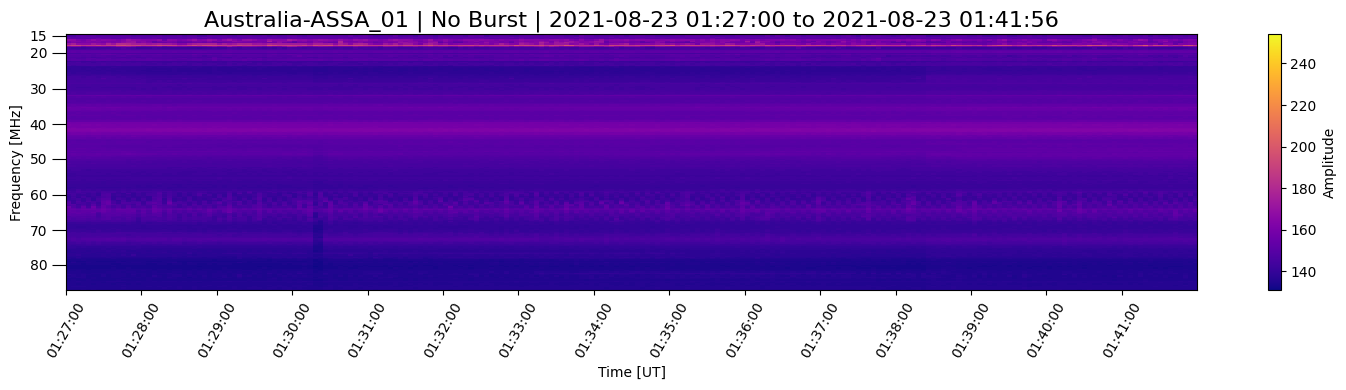

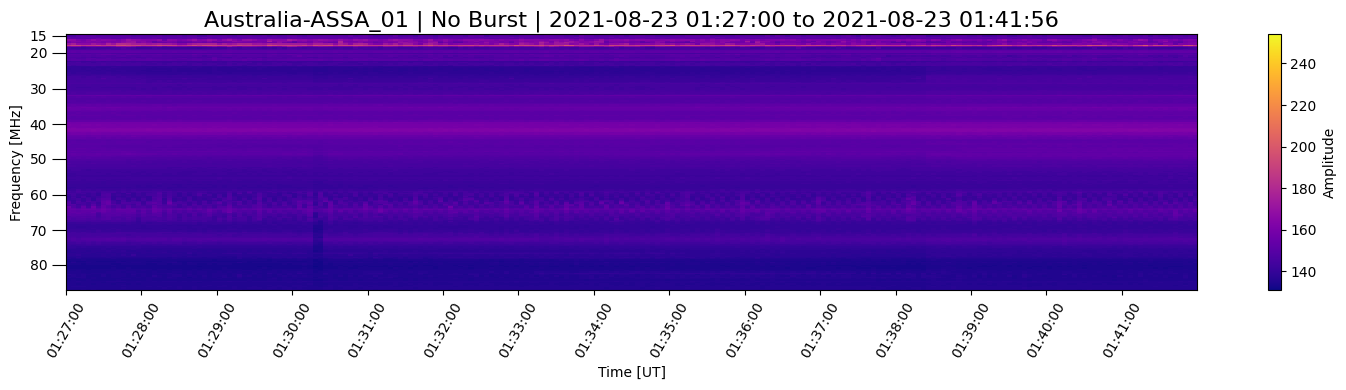

In [5]:
display(no_bursts.iloc[0])
temp_data = pd.read_parquet(f"{data_path}/{no_bursts.iloc[0].file_name}")
temp_data = preprocess(temp_data, length=224)
plot_spectogram_mpl(temp_data, fig_size=(15, 4), title="| No Burst")

Wir können hier gut erkennen, dass kein Burst vorhanden ist.

Um zu testen, ob wir die Spektren nachher auch für unsere Modelle in 224x244 konvertieren können, teste ich das hier.

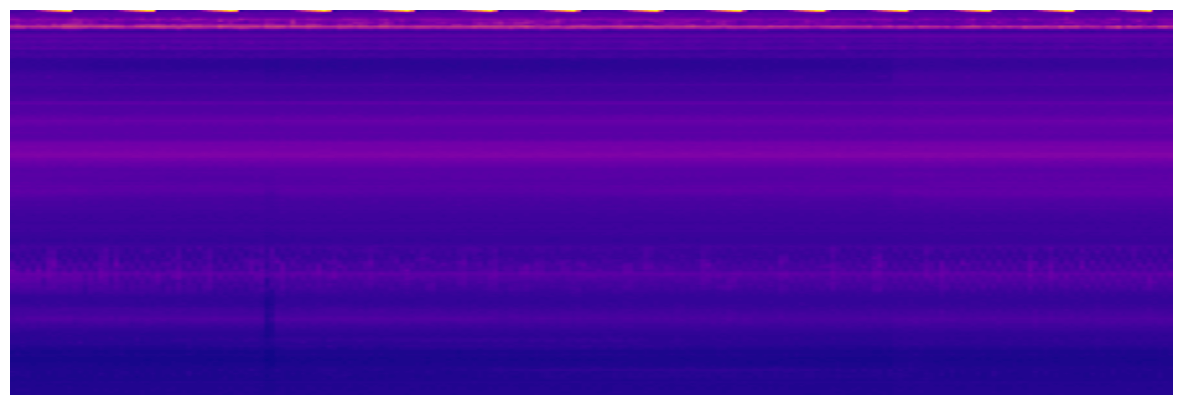

In [6]:
# plotted as 224x224 image
img = Image.fromarray(temp_data.values.T)
img = img.resize((224, 224))
plt.figure(figsize=(15, 5))
plt.imshow(img, aspect="auto", cmap="plasma")
plt.axis("off")
plt.show()

Ab hier visualisiere ich einige Bursts.

Bei einigen Bursts sind die Burst weniger gut erkennbar, wie hier:

datetime_start                              2021-08-23 01:27:00.077
datetime_end                                2021-08-23 01:41:59.942
instruments                                       Australia-ASSA_01
type                                                       no_burst
file_name         Australia-ASSA_01/no_burst/2021-08-23_01-27-00...
Name: 0, dtype: object

Shape after resampling: (225, 193)


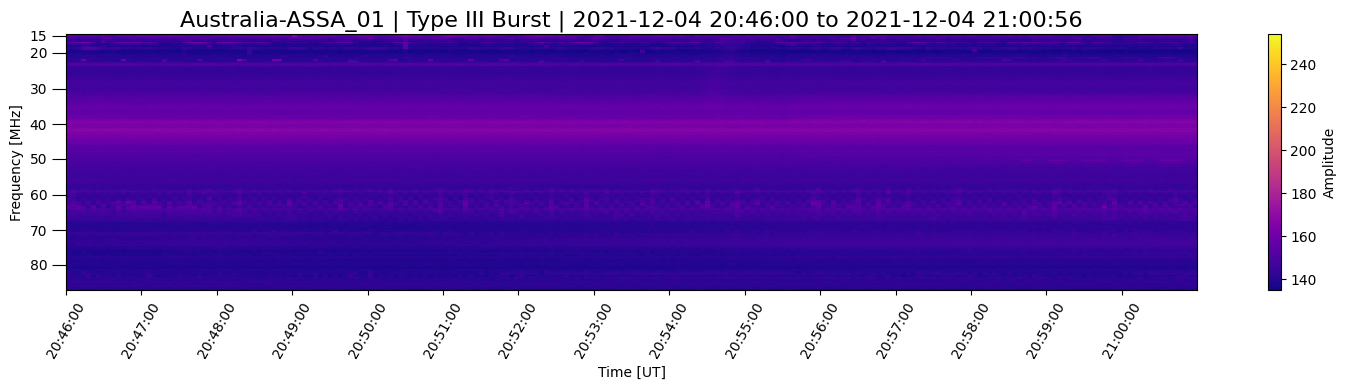

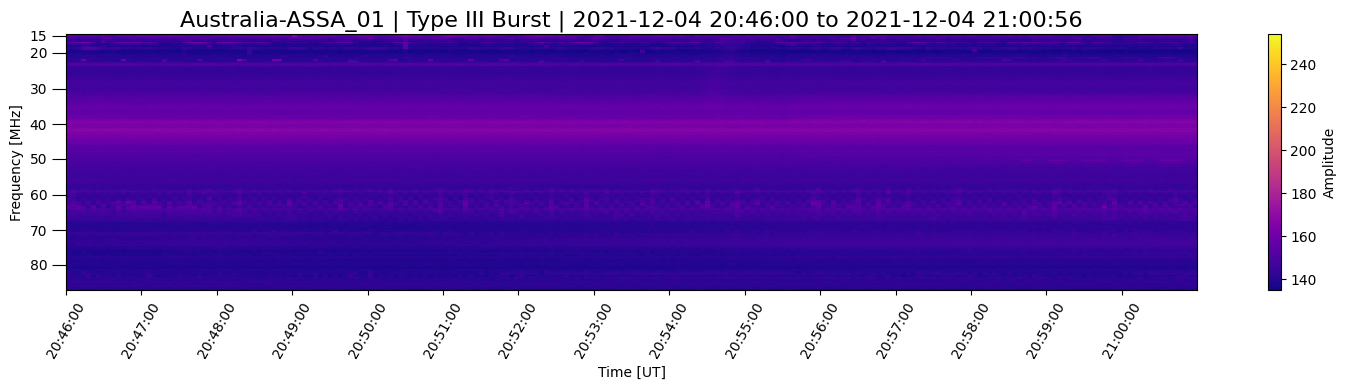

In [7]:
display(no_bursts.iloc[0])
temp_data = pd.read_parquet(f"{data_path}/{type3_bursts.iloc[0].file_name}")
temp_data = preprocess(temp_data)
plot_spectogram_mpl(temp_data, fig_size=(15, 4), title="| Type III Burst")

Hier aber, kann man den Burst sehr gut erkennen:

datetime_start                              2021-08-23 01:27:00.077
datetime_end                                2021-08-23 01:41:59.942
instruments                                       Australia-ASSA_01
type                                                       no_burst
file_name         Australia-ASSA_01/no_burst/2021-08-23_01-27-00...
Name: 0, dtype: object

Shape after resampling: (225, 193)


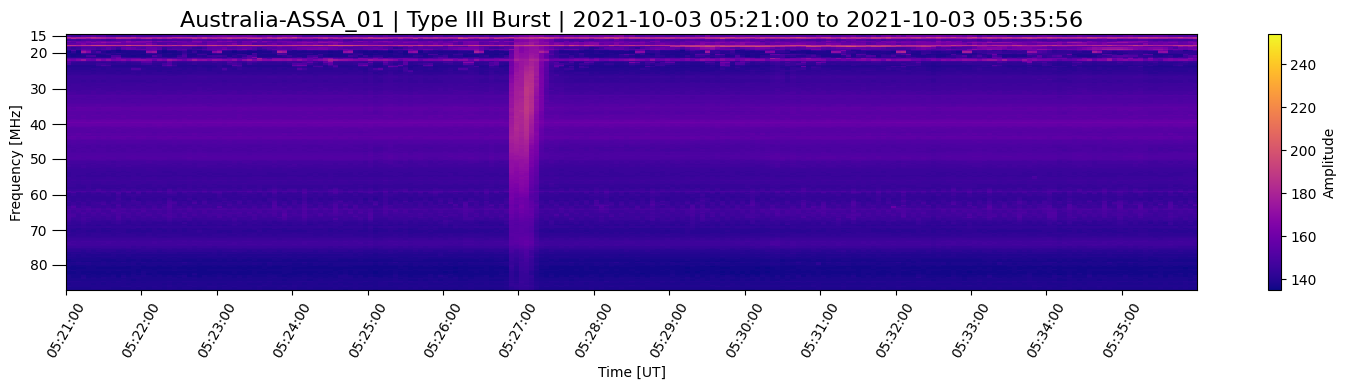

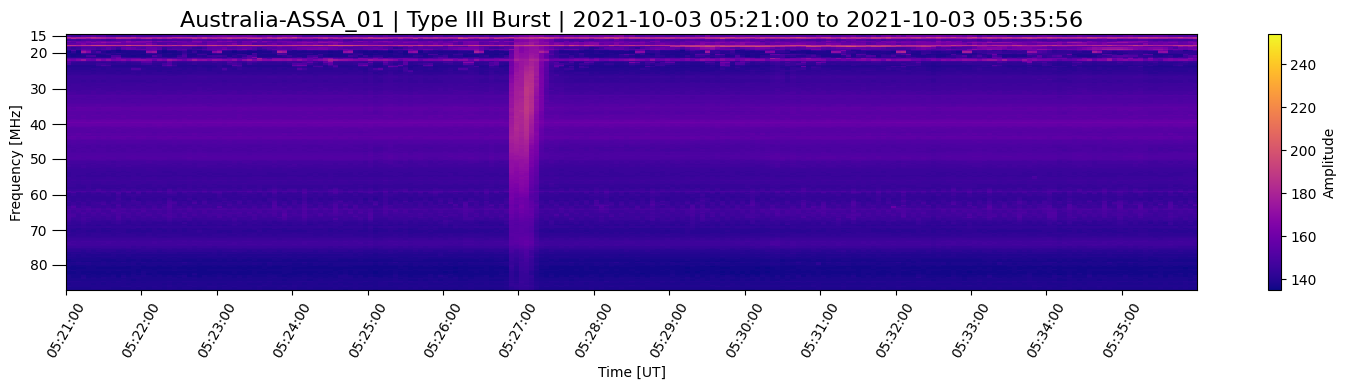

In [8]:
display(no_bursts.iloc[0])
temp_data = pd.read_parquet(f"{data_path}/{type3_bursts.iloc[50].file_name}")
temp_data = preprocess(temp_data)
plot_spectogram_mpl(temp_data, fig_size=(15, 4), title="| Type III Burst")

Hier visualisiere ich auch noch einen Typ II Burst, diese sind in der Norm sehr gut erkennbar:

datetime_start                              2021-08-23 01:27:00.077
datetime_end                                2021-08-23 01:41:59.942
instruments                                       Australia-ASSA_01
type                                                       no_burst
file_name         Australia-ASSA_01/no_burst/2021-08-23_01-27-00...
Name: 0, dtype: object

Shape after resampling: (225, 193)


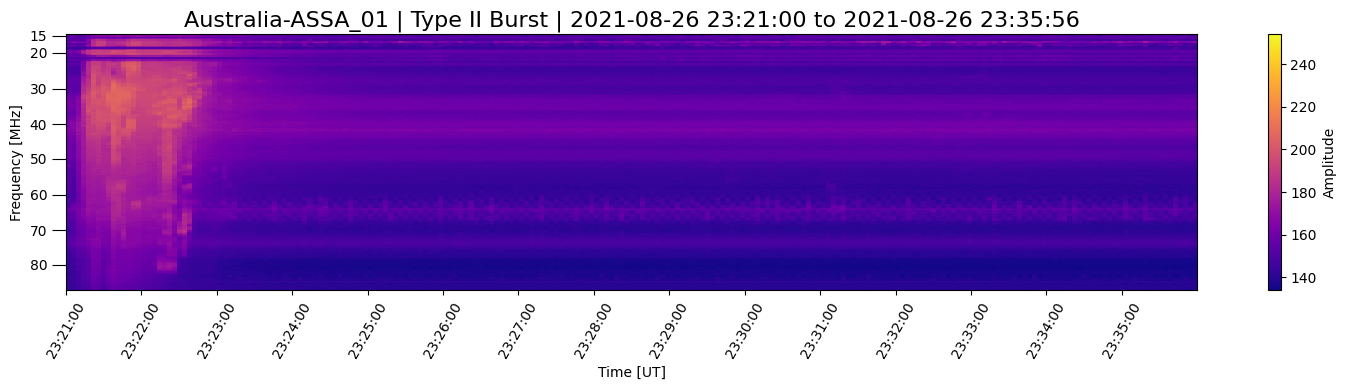

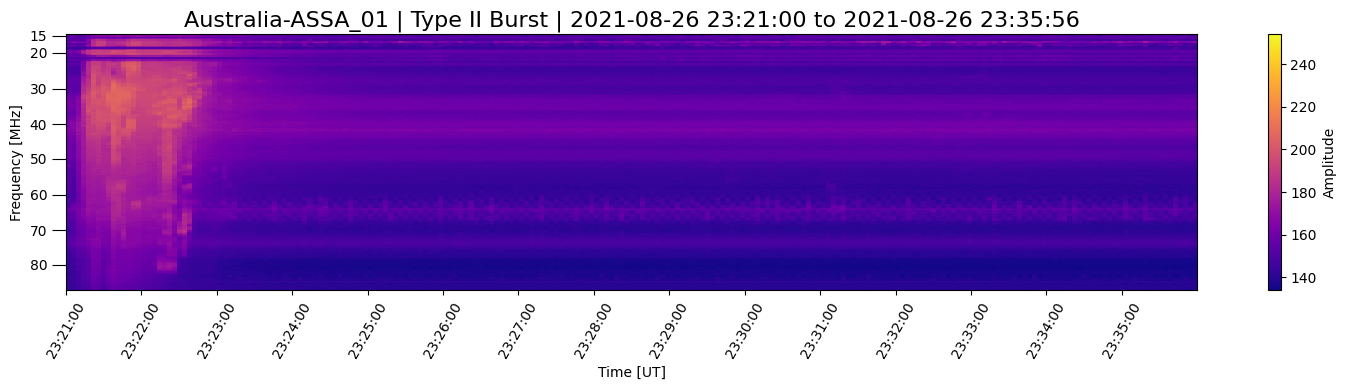

In [9]:
display(no_bursts.iloc[0])
temp_data = pd.read_parquet(f"{data_path}/{type2_bursts.iloc[2].file_name}")
temp_data = preprocess(temp_data)
plot_spectogram_mpl(temp_data, fig_size=(15, 4), title="| Type II Burst")

Hier visualisieren wir noch die Distribution der Burstklassen:

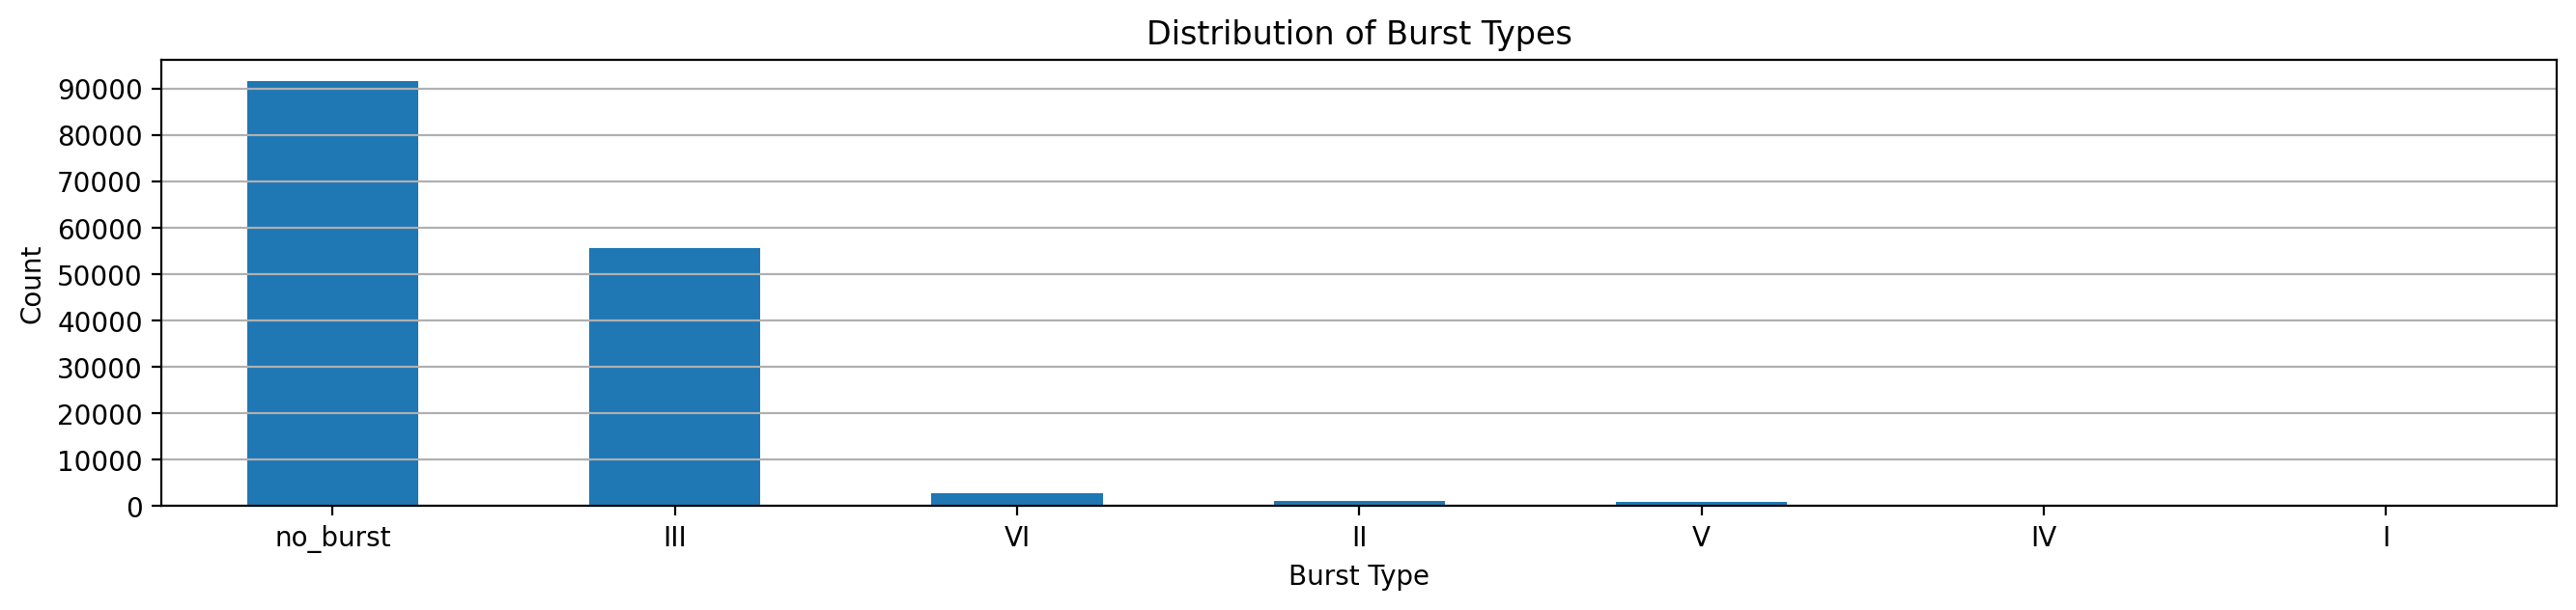

In [10]:
# distribution of burst types
plt.figure(figsize=(16, 3), dpi=200)
metadata.type.value_counts().plot(kind="bar")
plt.grid(axis="y")
plt.title("Distribution of Burst Types")
plt.ylabel("Count")
plt.yticks(np.arange(0, 100000, 10000))
plt.xlabel("Burst Type")
plt.xticks(rotation=0)
plt.show()